# Wetterstation in Waldkirch abfragen

In Waldkirch hat das Schülerforschungszentrum eine Wetterstation eingerichtet. Sie misst
- die Temperatur
- die Luftfeuchtigkeit und
- den Wind.

Wir können sie aus dem Internet aus erreichen.

Wenn Daten im Internet verfügbar gemacht werden, dann häufig über eine Schnittstelle (auch API genannt, was für *Application Programming Interface* steht)

In diesem Kursteil lernen wir, wie wir die API der Wetterstation nach Daten fragen können.

In [1]:
import requests

In [1]:
TOKEN = "GIB HIER DEN SCHLÜSSEL EIN"

## Letze Messung:

In [13]:
r = requests.get(
    "https://wetter.sfz-region-freiburg.de/api/v1/last-measurement",
    params = {"key": TOKEN}
)

In [12]:
r.json()

{'ok': 'true',
 'data': [{'temperature': 21.6,
   'wind': 0,
   'humidity': 64.5,
   'date': 1750098522}]}

## Letzten 100 Messungen:

In [175]:
r = requests.get(
    "https://wetter.sfz-region-freiburg.de/api/v1/measurements",
    params = {"key": TOKEN, "count": 11000, "step": 1000}
)

In [176]:
data = r.json()

In [177]:
temperature = [d["temperature"] for d in data["data"]]
wind = [d["wind"] for d in data["data"]]
humidity = [d["humidity"] for d in data["data"]]
date = [d["date"] for d in data["data"]]

In [178]:
import pandas as pd

In [179]:
df = pd.DataFrame({"temperature": temperature, "wind": wind, "humidity": humidity, "date": pd.to_datetime(date, utc=True, unit='s')})

<Axes: xlabel='date'>

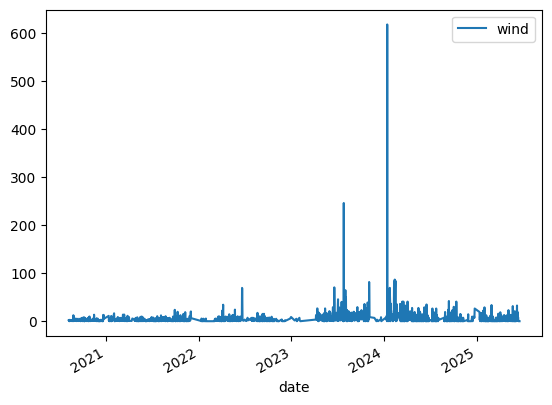

In [182]:
df[["date", "wind"]].plot(x="date")

<Axes: xlabel='date'>

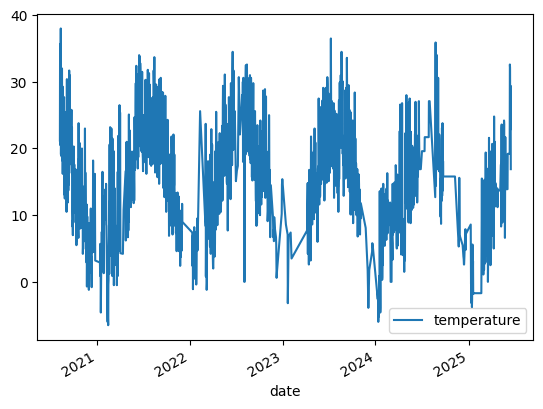

In [180]:
df[["date", "temperature"]].plot(x="date")

In [153]:
# !pip install scipy

In [154]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

In [155]:
def sinus(x, a, b, c, d):
    return a * np.sin(b * x+c) + d

In [156]:
param, param_cov = curve_fit(sinus, np.asarray(date), temperature)
param

C:\Users\matth\AppData\Local\Temp\ipykernel_5068\3706621467.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  param, param_cov = curve_fit(sinus, np.asarray(date), temperature)


array([ 0.34655762,  1.00000015,  1.        , 14.69203031])

In [157]:
from scipy.signal import savgol_filter

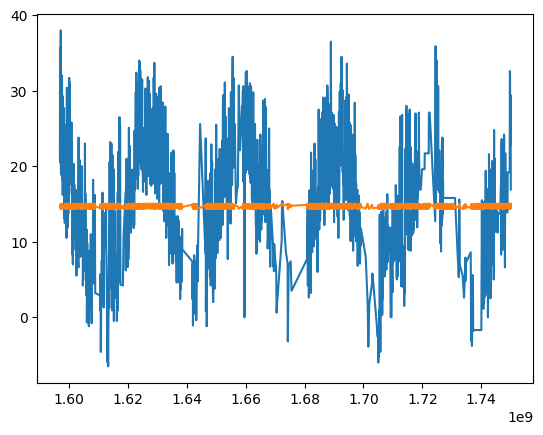

In [158]:
plt.figure()
plt.plot(date, temperature)
#plt.plot(date, savgol_filter(temperature, 51, 3))
plt.plot(date, sinus(np.asarray(date), param[0], param[1], param[2], param[3]))
plt.show()